In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.backends.backend_pdf
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_palette("bright", color_codes=True)

drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_0_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_1_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_2_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_3_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_4_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_5_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_6_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_7_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_8_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_9_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_10_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_11_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_12_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_13_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_14_epi_100
drl_accumulating_env_gridWorld_size_9_lr_0.1_seed_15_epi_100
drl_accumulating_env_gridWorld_siz

/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Volumes/MyStuff/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


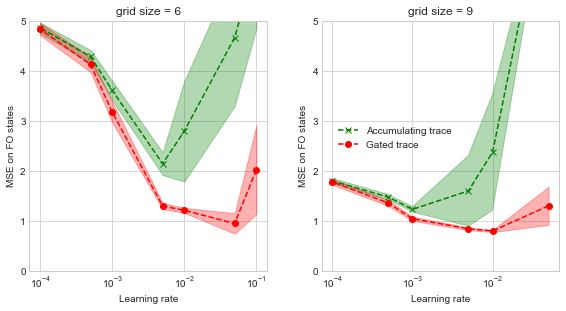

In [26]:
# gridWorld

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
length = [6, 9]
env = "gridWorld"
epi = 100
ci = 0.4
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_gridWorld_DRL_hp_tuning.pdf")
types = ["accumulating", "gated"]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax = ax.reshape(1,-1)
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
              

name = {"etd": "Emphatic TD", "accumulating": "Accumulating trace", "gated": "Gated trace"}
colors = {"etd": "blue", "accumulating": "green", "gated": "red"}
marker = {"etd": "*", "accumulating": "x", "gated": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        lr_list = []
        avg_error_list = []
        std_error_list = []
        for lr in learn_rate:
            seed_error = []
            for se in seed:
                flag = False
                try:
                    with open("../results_gridWorld/drl_"+t+"_env_"+env+"_size_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_epi_"+str(epi)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        tmp_avg = np.mean(np.array(tmpp))
                        if tmp_avg > 10 or np.isnan(tmp_avg):
                            tmp_avg = 10
                            flag = True
                        seed_error.append(tmp_avg)
                except:
                    print("drl_"+t+"_env_"+env+"_size_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_epi_"+str(epi))
            
            mean = np.mean(np.array(seed_error))
            avg_error_list.append(mean)
            if flag:
                std_error_list.append(np.zeros_like(mean))
            else:
                std_error_list.append(np.std(np.array(seed_error)))
            lr_list.append(lr)
            
        ax[row_plt, col_plt].plot(lr_list, avg_error_list, linestyle='dashed', marker=marker[t],\
                                  c=colors[t], markersize=6)
        ax[row_plt, col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                  np.array(avg_error_list)-ci*np.array(std_error_list), color=colors[t], alpha=0.3)
        ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("grid size = "+str(c_l), fontsize=12)
        #ax[row_plt, col_plt].set_xticks(np.log(np.array(learn_rate)))
        ax[row_plt, col_plt].set_ylim(0,5)
        ax[row_plt, col_plt].set_xlabel("Learning rate")
        ax[row_plt, col_plt].set_ylabel("MSE on FO states")
        
        
    col_plt += 1
    if col_plt == 2:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], loc="right", bbox_to_anchor=(0.5, 0., 0.3, 1.2))#loc="lower center", bbox_to_anchor=(0.4, 0., 0.5, -5), ncol=3)
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    